<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab</font></h1>
<hr>

 # **Árvores de Decisão e Modelos Supervisionados em Geral**
 ## Instruções

1. Empregue para este Laboratório o **material de Teoria**.

1. **Responda as questões** à medida que você realiza o Lab. 

2. Execute este Lab no **Colab Google**.

<img src="http://meusite.mackenzie.br/rogerio/TIC/SUP_ML.png" width=800, align="center"></a>
<h1 align=left><font size = 2, style="color:rgb(200,0,0)"> Fig. 1.Esquema Geral para Modelos Supervisionados </font></h1> 

<small><b>ERRATA: na figura considere confusion_matrix(y_test, y_pred)


# Caso: **Propensão de Compra de Clientes por Telemarketing** 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em telefonemas. Freqüentemente, era necessário mais de um contato para o mesmo cliente, para acessar se o produto (depósito bancário) seria ('yes') ou não ('no') assinado.

Os dados estão na URL: http://meusite.mackenzie.br/rogerio/TIC/bank-full.csv




# Exercício. Acesse e Explore os dados 

1. Qual o atributo **classe**?
1. Quantos registros de cada **classe**?
1. Todos os dados são numéricos? (por quê?)
1. Os dados encontram-se na mesma escala?
1. Qual o tamanho dos dados? (linhas e atributos)
1. Existem valores nulos?


In [ ]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

In [ ]:
# Seu código

bank = pd.read_csv(...

# Exercício. (**RESOLVIDO**)

Aqui verificamos se existem valores ausentes nos dados. Valores ausentes trazem em geral problemas (por quê?) e precisam ser tratados antes de empregarmos modelos. Veremos mais adiante como podemos tratar isso. 

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
if (bank.isnull().sum().sum()) == 0:
  print('Não existem valores ausentes (nulos)')

Não existem valores ausentes (nulos)


# Exercício. Defina as entradas `X` e saída `y` modelo

Lembre-se, em um modelo de classificação $X$ são as variáveis preditoras (*independentes*) e $y$ sua variável objetivo (*dependente*).

In [ ]:
# Seu código

X = ...
y = ...

# Preparação dos Dados

A **Preparação dos Dados** consiste em transformações dos dados que são necessárias ou úteis para preparar os dados para uso dos modelos. Encontram-se entre essas transformações:

1. Tratamento de valores faltantes
2. Normalizações
3. Codificação de Valores categóricos para numéricos (*encode*)
4. Codificação de Valores numéricos para classes de valores (discretização ou *binning*)
5. etc.

Vamos fazer aqui duas operações sobre os dados:

1. **Label encode**. Embora Árvores de Decisão possam empregar atributos categóricos, o `scikit-learn` requer que esses atributos sejam `label_encode`. É um requerimento da tecnologia, não do modelo.

1. **Normalização**. Árvores de Decisão também não são sensíveis a variação de escala (por quê?), mas vamos reescalar os dados para que você aprenda mais essa técnica e empregá-la no modelo `knn` mais adiante.

A primeira transformação é meramente técnica e faremos para você.

# Exercício. **Label Encode (RESOLVIDO)** 

Podemos fazer isso de diversas formas, mas o `scikit-learn` traz funções para isso.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_categorical = X.select_dtypes(exclude='number')
#  label encoding to all the columns 

print('Label Encode attributes: ', df_categorical)

print('education, valores antes: ', X.education.value_counts())

label_encoders = {}
for col in df_categorical:
  le = LabelEncoder()
  le.fit(X[col])
  X[col] = le.transform(X[col])
  label_encoders[col] = le # salva para empregar para novas instâncias

print('education, valores depois: ', X.education.value_counts())  

Label Encode attributes:                  job   marital  education default  ... loan    contact month poutcome
0        management   married   tertiary      no  ...   no    unknown   may  unknown
1        technician    single  secondary      no  ...   no    unknown   may  unknown
2      entrepreneur   married  secondary      no  ...  yes    unknown   may  unknown
3       blue-collar   married    unknown      no  ...   no    unknown   may  unknown
4           unknown    single    unknown      no  ...   no    unknown   may  unknown
...             ...       ...        ...     ...  ...  ...        ...   ...      ...
45206    technician   married   tertiary      no  ...   no   cellular   nov  unknown
45207       retired  divorced    primary      no  ...   no   cellular   nov  unknown
45208       retired   married  secondary      no  ...   no   cellular   nov  success
45209   blue-collar   married  secondary      no  ...   no  telephone   nov  unknown
45210  entrepreneur   married  secondar

# Exercício. Explore as técnicas de *Scale*

Verifique qual dos métodos abaixo corresponde a normalização:

$$ X_s = (X - X_{min}) / (X_{max} - X_{min}) $$

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = StandardScaler() # SUBSTITUA AQUI O MÉTODO
scaler.fit(data)
print(scaler.transform(data))

[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


# Exercício. Aplique o `StandardScaler` aos dados

Qual o a média e o desvido padrão dos valores de `X` depois da transformação?

In [ ]:
# Seu código

# Seu dado de entrada é X. Atribua a saída transformada para X_matrix.


X_matrix = ...

# Os dados transformados são então empregados para reconstruir o dataframe X. 

X = pd.DataFrame(X_matrix,columns=X.columns) # nada a fazer aqui, aqui a linha de código está pronta

# Exame em seguida os valores produzidos

...

# Exercício. Separe os Conjuntos de Treinamento `X_train`, `y_train` e Test `X_test`, `y_test`


In [ ]:
# Seu código
from sklearn.model_selection import train_test_split
seed = 1984 # empregue este




Qual a dimensão dos conjuntos `X_train, X_test, y_train, y_test`?

In [ ]:
# Seu código 



(31647, 16) (13564, 16) (31647,) (13564,)


Exiba os primeiros regitros de `X_train`. Qual o primeiro registro que aparece?

In [ ]:
# Seu código 



# Exercício. Declare o modelo e seus parâmetros `clf = model`

Declare um modelo de Árvore de decisão com o critério `gini` e o `seed` já empregado antes.

In [ ]:
# Seu código



# Exercício. Treine o modelo `clf.train(X_train, y_train)` e aplique ao conjunto de Teste `clf.pred(X_test)` 


In [ ]:
# Seu código



Qual a previsão para os 3 primeiros casos?

In [ ]:
# Seu código

Quantos casos foram classificados como 'yes'?


In [ ]:
# Seu código

# Exercício. Verifique os resultados, `<metric>(y_pred, y_test)`

In [ ]:
# Seu código



Qual a acuracidade total e qual classe apresenta pior resultado de classificação?

# Exercício. Crie um novo modelo `clf2` a partir do modelo anterior, alterando o método de seleção dos nós para `entropy` e a profundidade máxima da árvore para 16.

O resultado é melhor ou pior que o modelo anterior?

In [ ]:
# Seu código



# Exercício. Crie um novo modelo `clf3` do tipo k-vizinhos k=5 mais próximos

O resultado é melhor ou pior que o modelo anterior?

In [ ]:
# Seu código



# Exercício. Selecione o Modelo `clf2` e aplique a novos casos, `clf2.predict(X_new)` **RESOLVIDO**

Os novos casos aqui são gerados como permutação dos dados já presentes na base. Basta executar e fazer em seguida a previsão.

In [ ]:
seed1 = 1964 
new_bank = bank.sample(10,random_state=seed1)
new_bank = new_bank.sample(frac = 1)
new_bank.y = '?'
new_bank.head()

X_new = new_bank.drop(columns=['y'])

for col in df_categorical:
  le = label_encoders[col] # usando as transformações salvas anteriormente
  X_new[col] = le.transform(X_new[col])

X_new_matrix = scaler.transform(X_new)
X_new = pd.DataFrame(X_new_matrix,columns=X_new.columns)

A predição...

In [ ]:
# Seu código

y_pred = clf2.predict(X_new)

new_bank.y = y_pred

print(new_bank)

       age          job   marital  education  ... pdays  previous poutcome    y
40638   30   management    single   tertiary  ...    -1         0  unknown   no
33634   34     services   married  secondary  ...   350         1  failure   no
27994   31   technician    single   tertiary  ...    -1         0  unknown   no
2961    28  blue-collar   married  secondary  ...    -1         0  unknown   no
12804   40   technician   married    unknown  ...    -1         0  unknown   no
10622   36   management    single   tertiary  ...    -1         0  unknown   no
19488   31   technician   married  secondary  ...    -1         0  unknown   no
14648   32   management  divorced   tertiary  ...    -1         0  unknown  yes
24138   36       admin.   married  secondary  ...    -1         0  unknown   no
888     32   management   married   tertiary  ...    -1         0  unknown   no

[10 rows x 17 columns]


# Exercício. Plote sua Árvore de Decisão **RESOLVIDO**



[Text(230.33346388402106, 214.0425, 'X[11] <= 1.023\ngini = 0.207\nsamples = 31647\nvalue = [27945, 3702]'),
 Text(177.0316492490433, 207.2475, 'X[10] <= 1.323\ngini = 0.144\nsamples = 28187\nvalue = [25986, 2201]'),
 Text(139.90489302475518, 200.4525, 'X[13] <= -0.307\ngini = 0.126\nsamples = 27376\nvalue = [25523, 1853]'),
 Text(99.02705956897819, 193.6575, 'X[0] <= 1.842\ngini = 0.087\nsamples = 22622\nvalue = [21592, 1030]'),
 Text(60.68554691152321, 186.8625, 'X[11] <= -0.135\ngini = 0.078\nsamples = 22264\nvalue = [21362, 902]'),
 Text(14.67717407971636, 180.0675, 'X[10] <= -1.671\ngini = 0.039\nsamples = 15228\nvalue = [14922, 306]'),
 Text(5.09984441696254, 173.2725, 'X[6] <= -0.112\ngini = 0.206\nsamples = 575\nvalue = [508, 67]'),
 Text(2.880488291379104, 166.4775, 'X[9] <= 0.924\ngini = 0.4\nsamples = 203\nvalue = [147, 56]'),
 Text(1.6294570550923524, 159.6825, 'X[11] <= -0.603\ngini = 0.471\nsamples = 137\nvalue = [85, 52]'),
 Text(0.5698647624366697, 152.8875, 'X[5] <= 3.

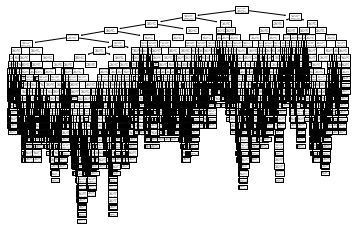

In [ ]:
from sklearn import tree
tree.plot_tree(clf2)